In [6]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# python3 select_view.py --data-dir DDD --scene SSSS --chunk CCC --overlap 0.5 --output-dir XXX

In [8]:
import os
import sys
sys.path.append('/home/artemov/repos/frustum_chunk_intersection')

In [9]:
import copy
import matplotlib.cm
import imageio
from skimage.transform import resize

import matplotlib.pyplot as plt
import numpy as np
import trimesh.transformations as tt

In [10]:
from src.voxel_chunk_data import VoxelDataPaths, compute_fraction_voxels_in_view
from src.plotting import (
    display_3d, PointsPlottable, CameraPlottable, VolumePlottable,
    CameraFrustumPlottable)
from src.colors import rgb_to_packed_colors
from src.camera_pose import CameraPose
from src.objects import CameraView

In [53]:
VoxelDataPaths.CHUNK_VOLUMES_DIR = 'data-geo-color-128'
VoxelDataPaths.IMAGES_DIR = 'images'

In [54]:
rooms = [VoxelDataPaths(
    data_root='/home/artemov/data/spsg/',
    scene_id='QUCTc6BB5sX',
    room_id=f'{i}',
    type_id='cmp',
    chunk_id='0',
    fraction=0.6,
    max_distance_thr=3 * 0.02,
    verbose=True, 
    load=True) for i in range(1)]
room = rooms[0]

Loading camera-chunk correspondences
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/*.txt


  2%|████▎                                                                                                                                                                                                                                                                                 | 41/2610 [00:00<00:06, 404.83it/s]

Loading camera views
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/0.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/0.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/0.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/10.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/10.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/10.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/100.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/100.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/100.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1000.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1000.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1000.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1001.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1001.jpg
/home/artemov/

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1072.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1072.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1072.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1073.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1073.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1073.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1074.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1074.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1074.png


  5%|█████████████                                                                                                                                                                                                                                                                        | 123/2610 [00:00<00:06, 402.90it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1075.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1075.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1075.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1076.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1076.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1076.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1077.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1077.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1077.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1078.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1078.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1078.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1079.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1079.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1079.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/108.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/108.jpg
/home/arte

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1132.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1132.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1132.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1133.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1133.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1133.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1134.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1134.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1134.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1135.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1135.jpg


  8%|█████████████████████▊                                                                                                                                                                                                                                                               | 205/2610 [00:00<00:05, 405.45it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1135.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1136.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1136.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1136.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1137.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1137.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1137.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1138.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1138.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1138.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1139.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1139.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1139.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/114.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/114.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/114.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1141.txt
/home/artem

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1209.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1209.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1209.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/121.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/121.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/121.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1210.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1210.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1210.png


 11%|██████████████████████████████▍                                                                                                                                                                                                                                                      | 287/2610 [00:00<00:05, 400.78it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1211.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1211.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1211.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1213.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1213.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1213.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1214.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1214.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1214.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1215.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1215.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1215.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1216.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1216.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1216.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1217.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1217.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1284.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1286.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1286.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1286.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1287.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1287.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1287.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1288.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1288.jpg


 14%|███████████████████████████████████████                                                                                                                                                                                                                                              | 368/2610 [00:00<00:05, 397.43it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1288.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1289.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1289.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1289.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/129.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/129.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/129.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1290.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1290.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1290.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1291.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1291.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1291.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1292.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1292.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1292.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1293.txt
/home/artem

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1360.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1360.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1360.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1361.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1361.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1361.png


 17%|███████████████████████████████████████████████▌                                                                                                                                                                                                                                     | 448/2610 [00:01<00:05, 395.85it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1362.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1362.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1362.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1363.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1363.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1363.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1364.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1364.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1364.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1365.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1365.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1365.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1366.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1366.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1366.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1367.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1367.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1436.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1436.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1436.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1437.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1437.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1437.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1438.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1438.jpg


 20%|████████████████████████████████████████████████████████                                                                                                                                                                                                                             | 528/2610 [00:01<00:05, 393.03it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1438.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1439.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1439.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1439.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/144.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/144.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/144.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1440.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1440.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1440.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1441.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1441.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1441.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1442.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1442.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1442.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1443.txt
/home/artem

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/151.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/151.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/151.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1510.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1510.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1510.png


 23%|████████████████████████████████████████████████████████████████▋                                                                                                                                                                                                                    | 609/2610 [00:01<00:05, 395.19it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1511.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1511.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1511.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1512.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1512.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1512.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1513.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1513.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1513.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1514.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1514.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1514.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1515.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1515.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1515.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1516.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1516.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1586.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1586.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1587.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1587.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1587.png


 26%|█████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                           | 690/2610 [00:01<00:04, 398.48it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1588.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1588.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1588.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1589.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1589.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1589.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/159.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/159.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/159.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1590.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1590.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1590.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1592.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1592.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1592.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1593.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1593.jpg
/home/artem

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1339.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1339.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1339.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1357.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1357.jpg


 30%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                                   | 771/2610 [00:01<00:04, 401.31it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1357.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1375.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1375.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1375.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1393.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1393.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1393.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1410.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1410.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1410.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1429.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1429.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1429.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1447.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1447.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1447.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1465.txt
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1723.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1723.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1723.png


 33%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                          | 853/2610 [00:02<00:04, 400.94it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1724.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1724.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1724.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1725.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1725.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1725.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1726.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1726.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1726.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1727.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1727.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1727.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1728.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1728.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1728.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1729.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1729.jpg
/home/ar

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1800.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1801.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1801.jpg


 36%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                 | 936/2610 [00:02<00:04, 405.27it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1801.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1802.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1802.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1802.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1803.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1803.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1803.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1804.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1804.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1804.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1805.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1805.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1805.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1806.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1806.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1806.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1808.txt
/home/ar

 39%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                        | 1019/2610 [00:02<00:03, 408.39it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1880.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1880.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1880.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1881.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1881.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1881.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1882.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1882.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1882.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1883.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1883.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1883.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1884.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1884.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1884.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1885.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1885.jpg
/home/ar

 42%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                               | 1103/2610 [00:02<00:03, 409.59it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/color/196.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/196.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1960.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1960.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1960.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1961.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1961.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1961.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1962.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1962.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1962.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1963.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1963.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1963.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1964.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1964.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1964.png
/home/artem

 45%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                      | 1187/2610 [00:02<00:03, 410.83it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/202.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/202.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/202.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2020.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2020.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2020.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2021.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2021.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2021.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2023.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2023.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2023.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2024.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2024.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2024.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2025.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2025.jpg
/home/artem

 49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                             | 1271/2610 [00:03<00:03, 408.87it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2099.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/21.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/21.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/21.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/210.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/210.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/210.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2100.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2100.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2100.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2101.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2101.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2101.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2102.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2102.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2102.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2103.txt
/home/artemov/dat

 52%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                    | 1354/2610 [00:03<00:03, 408.68it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2176.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2177.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2177.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2177.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2178.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2178.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2178.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2179.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2179.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2179.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/218.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/218.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/218.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2180.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2180.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2180.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2181.txt
/home/artem

 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                            | 1436/2610 [00:03<00:02, 406.19it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2253.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2253.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2253.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2254.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2254.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2254.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2255.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2255.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2255.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2256.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2256.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2256.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2258.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2258.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2258.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2259.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2259.jpg
/home/ar

 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                   | 1519/2610 [00:03<00:02, 408.20it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2331.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2331.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2331.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2332.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2332.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2332.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2333.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2333.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2333.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2334.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2334.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2334.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2335.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2335.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2335.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2336.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2336.jpg
/home/ar

 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                          | 1601/2610 [00:03<00:02, 407.32it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2393.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2393.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2393.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2394.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2394.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2394.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2395.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2395.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2395.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2396.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2396.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2396.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2397.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2397.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2397.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2398.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2398.jpg
/home/ar

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 1683/2610 [00:04<00:02, 406.90it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2470.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2470.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2470.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2471.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2471.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2471.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2472.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2472.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2472.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2474.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2474.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2474.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2475.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2475.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2475.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2476.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2476.jpg
/home/ar

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                         | 1765/2610 [00:04<00:02, 404.81it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2549.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2549.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2549.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/255.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/255.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/255.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2550.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2550.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2550.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2551.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2551.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2551.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2552.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2552.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/2552.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/2553.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/2553.jpg
/home/artem

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                | 1850/2610 [00:04<00:01, 411.82it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/279.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/279.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/279.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/28.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/28.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/28.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/280.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/280.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/280.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/281.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/281.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/281.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/282.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/282.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/282.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/283.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/283.jpg
/home/artemov/data/spsg/imag

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 1934/2610 [00:04<00:01, 412.54it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/26.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/27.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/27.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/27.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/289.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/289.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/289.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/307.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/307.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/307.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/326.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/326.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/326.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1320.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/1320.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/1320.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/1663.txt
/home/artemov/data/spsg/i

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 2018/2610 [00:04<00:01, 411.85it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/415.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/415.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/415.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/416.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/416.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/416.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/417.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/417.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/417.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/418.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/418.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/418.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/419.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/419.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/419.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/42.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/42.jpg
/home/artemov/data/spsg/ima

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 2104/2610 [00:05<00:01, 417.49it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/494.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/494.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/494.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/495.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/495.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/495.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/496.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/496.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/496.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/498.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/498.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/498.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/499.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/499.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/499.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/5.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/5.jpg
/home/artemov/data/spsg/image

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 2188/2610 [00:05<00:01, 408.53it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/574.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/574.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/574.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/575.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/575.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/575.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/576.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/576.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/576.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/577.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/577.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/577.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/578.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/578.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/578.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/579.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/579.jpg
/home/artemov/data/spsg/i

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 2274/2610 [00:05<00:00, 416.54it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/651.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/651.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/651.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/652.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/652.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/652.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/653.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/653.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/653.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/654.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/654.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/654.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/655.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/655.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/655.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/656.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/656.jpg
/home/artemov/data/spsg/i

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 2359/2610 [00:05<00:00, 416.72it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/515.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/515.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/515.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/534.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/534.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/534.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/553.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/553.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/553.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/572.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/572.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/572.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/591.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/591.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/591.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/61.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/61.jpg
/home/artemov/data/spsg/ima

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 2444/2610 [00:06<00:00, 418.34it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/78.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/78.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/78.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/781.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/781.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/781.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/782.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/782.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/782.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/783.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/783.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/783.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/784.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/784.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/784.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/785.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/785.jpg
/home/artemov/data/spsg/imag

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2528/2610 [00:06<00:00, 414.22it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/86.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/86.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/86.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/860.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/860.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/860.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/861.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/861.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/861.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/862.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/862.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/862.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/863.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/863.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/863.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/864.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/864.jpg
/home/artemov/data/spsg/imag

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2610/2610 [00:06<00:00, 406.73it/s]

/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/937.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/938.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/938.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/938.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/939.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/939.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/939.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/94.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/94.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/94.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/940.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/940.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/940.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/941.txt
/home/artemov/data/spsg/images/QUCTc6BB5sX/color/941.jpg
/home/artemov/data/spsg/images/QUCTc6BB5sX/depth/941.png
/home/artemov/data/spsg/images/QUCTc6BB5sX/camera/942.txt
/home/artemov/data/spsg/imag

Loading chunks


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.69it/s]

/home/artemov/data/spsg/data-geo-color-128/QUCTc6BB5sX_room0__cmp__0.sdf


In [108]:
associations = np.loadtxt('/home/artemov/data/spsg/association/QUCTc6BB5sX_room0.txt', dtype=np.str_)
associations

array(['1116', '1117', '1118', '1119', '1120', '1121', '1134', '1135',
       '1136', '1137', '1138', '1139', '1224', '1225', '1226', '1227',
       '1228', '1229', '1398', '1399', '1400', '1401', '1402', '1403',
       '1614', '1615', '1616', '1617', '1618', '1619', '1986', '1987',
       '1988', '1989', '1990', '1991', '2004', '2005', '2006', '2007',
       '2008', '2009', '2094', '2095', '2096', '2097', '2098', '2099',
       '2268', '2269', '2270', '2271', '2272', '2273', '246', '247',
       '248', '2484', '2485', '2486', '2487', '2488', '2489', '249',
       '250', '251', '264', '265', '266', '267', '268', '269', '354',
       '355', '356', '357', '358', '359', '528', '529', '530', '531',
       '532', '533', '744', '745', '746', '747', '748', '749'],
      dtype='<U4')

In [59]:
computed_correspondences = np.loadtxt(
    '/home/artemov/data/spsg/computed-correspondences/QUCTc6BB5sX_room0__cmp__0.txt')
camera_ids = computed_correspondences[:, 0].astype(np.int_)
overlap = computed_correspondences[:, 1].astype(np.float_)

In [60]:
indexes = np.where(np.isin(camera_ids, associations))[0]
print(camera_ids[indexes][overlap[indexes] > 0.05])
print(overlap[indexes][overlap[indexes] > 0.05].tolist())

[1117  247 1116 1987 1118 1990 1986 2008 1988 1989  246 2096 2272]
[0.1067, 0.1411, 0.0681, 0.0775, 0.0869, 0.0565, 0.0757, 0.1412, 0.0815, 0.0867, 0.0715, 0.1068, 0.1623]


In [138]:
chunk_view_visibility = room.compute_fraction_voxels_in_view(camera_ids_to_check=associations)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:03<00:00, 26.14it/s]


In [79]:
view_ids_1 = set(view_id for view_id, fraction in chunk_view_visibility['0'].items() if fraction > 0)

In [68]:
chunk_view_visibility = room.compute_fraction_voxels_in_view()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2610/2610 [01:48<00:00, 24.05it/s]


In [75]:
view_ids_2 = set(view_id for view_id, fraction in chunk_view_visibility['0'].items() if fraction > 0)

In [111]:
len(view_ids_2)

56

In [141]:
view_ids_3 = set(view_id for view_id, fraction in chunk_view_visibility['0'].items() if fraction > 0)
len(view_ids_3)

34

In [161]:
full_volumes = []
for room in rooms:
    full_volume = room.full_volume
    full_volume.plot_type = 'points'
    full_volume.plot_sdf_thr = 0.5
    full_volume.plot_colors = True
    full_volumes.append(full_volume)

for chunk_volume in room.chunk_volumes:
    chunk_volume.plot_type = 'points'
    chunk_volume.plot_sdf_thr = 0.5

for view in room.camera_views.values():
#     view.plot_type = 'axes'
#     view.line_length = 0.1
#     view.line_width = 0.05
    view.plot_type = 'frustum'
    view.line_length = 1.0
    view.opacity = 1.0

In [158]:
chunk_volume = room.chunk_volumes[0]
camera_view = room.camera_views['1116']
full_volume = room.full_volume

In [151]:
 _ = display_3d(
    room.full_volume,
    chunk_volume,
#     *[room.camera_views[str(i)] for i in view_ids_3],
    camera_view,
    height=1024
)

Output()

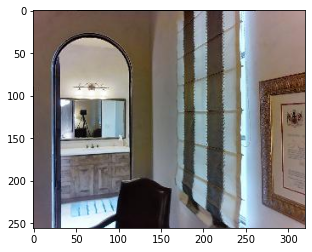

In [153]:
plt.imshow(camera_view.rgb)

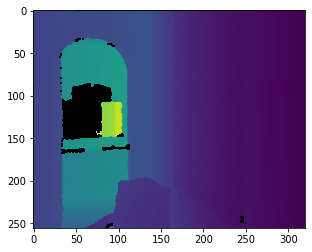

In [154]:
cmap = copy.copy(matplotlib.cm.get_cmap('viridis'))
cmap.set_bad(color='black')
depth_image = np.array(camera_view.depth.copy(), dtype=np.float_)
depth_image[depth_image == 0.] = np.nan
plt.imshow(depth_image, cmap=cmap)

In [ ]:
FACTOR = 1

depth_image_orig = imageio.imread('/home/artemov/data/spsg/matterport_original_data/QUCTc6BB5sX/QUCTc6BB5sX/undistorted_depth_images/4aab0b4dda514c84bce5491132392d73_d1_4.png')
rgb_image_orig = imageio.imread('/home/artemov/data/spsg/matterport_original_data/QUCTc6BB5sX/QUCTc6BB5sX/undistorted_color_images/4aab0b4dda514c84bce5491132392d73_i1_4.jpg')
# depth_image_orig = imageio.imread('/home/artemov/data/spsg/matterport_original_data/QUCTc6BB5sX/QUCTc6BB5sX/matterport_depth_images/4aab0b4dda514c84bce5491132392d73_d1_0.png')
depth_image_orig = depth_image_orig / 4

# depth_image_orig = resize(
#     depth_image_orig, 
#     (int(depth_image_orig.shape[0] / FACTOR), int(depth_image_orig.shape[1] / FACTOR)), 
#      anti_aliasing=False) 
# depth_image_orig = depth_image_orig.astype(np.uint16)
# cmap = copy.copy(matplotlib.cm.get_cmap('viridis'))
# plt.imshow(np.abs(depth_image_orig.astype(np.float_) - camera_view.depth.astype(np.float_)), cmap=cmap, vmin=0.0, vmax=10.)
# _=plt.hist((depth_image_orig.astype(np.float_) - camera_view.depth.astype(np.float_)).ravel(), bins=100, range=[-100, 100])
# plt.yscale('log')


In [32]:
def unproject_rgbd(camera_view):
    """Given a camera view with depth, rgb, intrinsics, and extrinsics, 
    compute a camera view with point cloud defined in global frame, 
    rgb, intrinsics, and extrinsics."""
    pixels = camera_view.depth
    height, width = pixels.shape
    i, j = np.meshgrid(np.arange(width), np.arange(height))
    image_integers = np.stack((
        i.ravel(),
        j.ravel(),
        np.ones_like(i).ravel()
    )).T  # [n, 3]
    image_integers = image_integers.astype(np.float32)
    depth_integers = pixels.ravel()
    image_integers = image_integers[depth_integers != 0]
    colors = camera_view.rgb.reshape((-1, 3))[depth_integers != 0]
    depth = depth_integers[depth_integers != 0].astype(np.float32) / 1000
    unprojected_depth = tt.transform_points(
        image_integers,
        np.linalg.inv(camera_view.intrinsics))
    unprojected_depth *= np.atleast_2d(depth).T
    unprojected_pc = CameraPose(camera_view.extrinsics).camera_to_world(unprojected_depth)

    from copy import deepcopy
    output_view = deepcopy(camera_view)
    output_view.rgb = colors
    output_view.depth = unprojected_pc
    return output_view

In [159]:
output_view = unproject_rgbd(camera_view)

In [166]:
camera_view.line_length = 4
    
_ = display_3d(
#     room.full_volume,
#     chunk_volume,
    PointsPlottable(
        output_view.depth, point_size=0.02, point_shader='3d', 
        point_colors=rgb_to_packed_colors(output_view.rgb[:,0], output_view.rgb[:,1], output_view.rgb[:,2]),
    ),
#     PointsPlottable(unprojected, point_size=0.02, point_shader='3d'),
     camera_view,
    height=1024
)

Output()

In [28]:
def project_rgbd(camera_view, points, colors):
    """Given a scene with 3D points and RGB colors, and 
    a camera view with depth, rgb, intrinsics, and extrinsics, 
    compute an output camera view with depth, rgb, intrinsics, and extrinsics, 
    by projecting the 3D points to camera frame."""
    unprojected_pc = CameraPose(camera_view.extrinsics).world_to_camera(points)
    depth = unprojected_pc[:, 2].copy()
    unprojected_pc /= np.atleast_2d(depth).T
    uv = tt.transform_points(unprojected_pc, camera_view.intrinsics)
    height, width = camera_view.depth.shape
    mask = (uv[:, 0] > 0) & (uv[:, 0] < width) \
         & (uv[:, 1] > 0) & (uv[:, 1] < height) \
         & (depth > 1e-2)
    uv_int = np.floor(uv[mask]).astype(np.int_)
    out_depth = np.zeros_like(camera_view.depth, dtype=np.float32)
    out_depth[uv_int[:, 1], uv_int[:, 0]] = depth[mask]
    out_color = np.zeros_like(camera_view.rgb, dtype=np.int_)
    out_color[uv_int[:, 1], uv_int[:, 0]] = colors[mask]
    
    from copy import deepcopy
    output_view = deepcopy(camera_view)
    output_view.rgb = out_color
    output_view.depth = out_depth
    return output_view

In [29]:
rendered_view = project_rgbd(camera_view, full_volume.voxels_xyz, full_volume.colors)

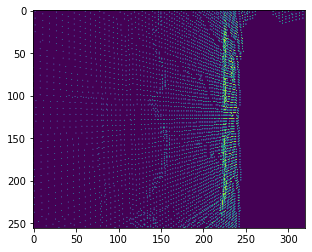

In [30]:
plt.imshow(rendered_view.depth)

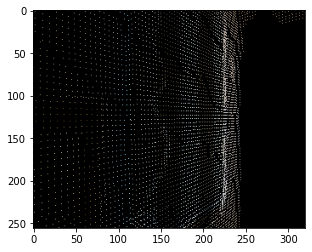

In [31]:
plt.imshow(rendered_view.rgb)

In [ ]:
compute_fraction_voxels_in_view

In [ ]:
paths = VoxelDataPaths(
    data_root='/home/artemov/data/spsg/',
    scene_id='QUCTc6BB5sX',
    room_id='9',
    type_id='cmp',
    chunk_id='*',
    fraction=0.6,
    verbose=True)
paths.load()

In [ ]:
computed_correspondences = np.loadtxt(
    '/home/artemov/data/spsg/computed-correspondences/QUCTc6BB5sX_room9__cmp__20.txt')
camera_ids = computed_correspondences[:, 0].astype(np.int_)
overlap = computed_correspondences[:, 1].astype(np.float_)

# with open('/home/artemov/data/spsg/computed-correspondences/QUCTc6BB5sX_room9__cmp__20.txt') as f:
#     for line in f:
#         camera_id, intersection = line.strip().split()
#         computed_correspondences[camera_id] = float(intersection)

In [ ]:
for idx in np.where(overlap>0.1)[0]:
    print(camera_ids[idx], overlap[idx])

In [ ]:
_=plt.hist(chunk.sdf.ravel(), range=[-4, 4], bins=100)

In [ ]:
full_volume = paths10._data.full_volume
full_volume.plot_type = 'points'
full_volume.plot_sdf_thr = 2.0
full_volume.plot_colors = False

full_volume = paths.full_volume
full_volume.plot_type = 'points'
full_volume.plot_sdf_thr = 2.0
full_volume.plot_colors = False

for chunk_volume in paths.chunk_volumes:
    chunk_volume.plot_type = 'points'
    chunk_volume.plot_sdf_thr = 0.5
    
for view in paths.camera_views.values():
    view.plot_type = 'frustum'
    view.line_length = 0.01
    view.line_width = 0.05
    view.opacity = 0.2

In [ ]:
chunk = next(chunk for chunk in paths._data.chunk_volumes if chunk.id == '20')
camera_view = paths.camera_views[str(524)]

In [ ]:
plt.imshow(camera_view.rgb)

In [ ]:
 _ = display_3d(
    paths._data.full_volume,
     paths10._data.full_volume,
#     chunk,
#     camera_view,
#      *(paths.camera_views[str(view_id)] for view_id in camera_ids[overlap>0.1]),
#     paths.camera_views['851'],
#     paths.camera_views['1859'],
#     paths.camera_views['187'],
#     paths.camera_views['524'],
#     paths.camera_views['2562'],
    height=1024
)

In [ ]:
# CameraFrustumPlottable(
#     camera_pose=CameraPose(paths.camera_views[537].extrinsics),
#     focal_length=paths.camera_views[537].intrinsics[0, 0],
#     image_size=np.array([320, 256]),
#     principal_point=paths.camera_views[537].intrinsics[[0, 1], 2],
#     sensor_size=np.array([0.001, 0.00075])
# )

In [ ]:
chunk_volume = chunk
camera_view = camera_view
frame_size = None

points = chunk_volume.voxels_xyz  # generate points based on chunk_volume
projected = tt.transform_points(
    CameraPose(camera_view.extrinsics).world_to_camera(points),
    camera_view.intrinsics)

In [ ]:
full_points = full_volume.voxels_xyz
full_projected = tt.transform_points(
    CameraPose(camera_view.extrinsics).world_to_camera(full_points),
    camera_view.intrinsics)


In [ ]:
full_projected.shape, projected.shape

In [ ]:
if None is not frame_size:
    width, height = frame_size
else:
    width = 2 * camera_view.intrinsics[0, 2]
    height = 2 * camera_view.intrinsics[1, 2]
mask = (projected[:, 0] > 0) & (projected[:, 0] < width) \
       & (projected[:, 1] > 0) & (projected[:, 1] < height) \
       & (projected[:, 2] > 0)

In [ ]:
depth = np.concatenate((full_projected, projected[mask]))

In [ ]:
from scipy.spatial import cKDTree

In [ ]:
n_neighbours=64
n_jobs=4
vis_type='mean'

# take UV coordinates of the pixel in the image space
uv, z = depth[:, :2], depth[:, 2]
# index for fast neighbour queries
kdt = cKDTree(uv)
distances, indexes = kdt.query(
    uv,
    k=n_neighbours + 1,
    n_jobs=n_jobs)

# take groups of points around each query point
z_nbr = z[indexes[:, 1:]]
# min/max depth of points in each group
z_min = np.min(z_nbr, axis=1)
z_max = np.max(z_nbr, axis=1)
# depth of the query point
z_point = z[indexes[:, 0]]
# compute continuous visibility scores;
# score -> 0 (very large d_p) means background/invisible,
# score -> 1 (small d_p) means foreground/visible
visible_score = np.exp(-(z_point - z_min) ** 2 / (z_max - z_min) ** 2)
if 'mean' == vis_type:
    thr = np.mean(visible_score)
else:
    assert isinstance(vis_type, float)
    thr = vis_type
visibility_mask = (visible_score > thr).astype(bool)

In [ ]:
visibility_mask.shape, len(full_projected) + len(projected[mask])

In [ ]:
len(chunk.voxels_xyz[mask][visibility_mask[-len(projected[mask]):]]) / len(chunk.voxels_xyz)

In [ ]:
 _ = display_3d(
     chunk,
    PointsPlottable(
        points=chunk.voxels_xyz[mask][visibility_mask[-len(projected[mask]):]],
        point_size=0.02,
    ),
    camera_view,
    height=1024
)

In [ ]:
paths.camera_views.keys()

In [ ]:
paths.camera_views[537].rgb.shape

In [ ]:
view = paths.camera_views[3273]
plt.imshow(view.rgb)

In [ ]:
frustum = CameraFrustum(view.extrinsics, [view.intrinsics, view.intrinsics])
points = paths.full_volume.voxels_xyz
mask = frustum.is_visible(points)

In [ ]:
projected_points = tt.transform_points(
    CameraPose(view.extrinsics).world_to_camera(points), 
    view.intrinsics)

In [ ]:
view.intrinsics

In [ ]:
mask = (projected_points[:, 0] > 0) & (projected_points[:, 0] < 320) \
    & (projected_points[:, 1] > 0) & (projected_points[:, 1] < 256) \
    & (projected_points[:, 2] > 0)

In [ ]:
points[mask].shape

In [ ]:
 _ = display_3d(
    PointsPlottable(points, point_size=0.02),
     PointsPlottable(
         points[mask], 
         point_size=0.02,
         point_color=0xff0000),
    CameraFrustumPlottable(
        camera_pose=CameraPose(paths.camera_views[3273].extrinsics),
        focal_length=[paths.camera_views[3273].intrinsics[0, 0]],
        image_size=np.array([320, 256]),
        principal_point=paths.camera_views[3273].intrinsics[[0, 1], 2],
        sensor_size=np.array([320, 256]),
        line_length=0.01,
    ),
    height=1024
)

In [ ]:
 _ = display_3d(
    paths._data,
#     full_volume,
#     chunk_volume,
#     view,
    CameraFrustumPlottable(
        camera_pose=CameraPose(paths.camera_views[3273].extrinsics),
        focal_length=[paths.camera_views[3273].intrinsics[0, 0]],
        image_size=np.array([320, 256]),
        principal_point=paths.camera_views[3273].intrinsics[[0, 1], 2],
        sensor_size=np.array([320, 256]),
        line_length=0.01,
    ),
    height=1024
)

In [ ]:
paths.chunk_volumes[0].id

In [ ]:
_ = display_3d(
    VolumePlottable(
    sdf < 0.1)
)

In [ ]:
[view.extrinsics for view in paths.camera_views]

In [ ]:
_ = display_3d(
    PointsPlottable(
        points=tt.transform_points(
            full_volume.room_locs[room_mask], full_volume.room_transform),
        point_colors=rgb_to_packed_colors(colors[room_mask, 0], colors[room_mask, 1], colors[room_mask, 2]),
        point_size=100.0,),
    *[CameraPlottable(
        CameraPose(view.extrinsics),
        line_length=1000.0,
        line_width=10.0) for view in paths.camera_views],
    height=1024,
)

In [ ]:
tt.transform_points(
            full_volume.room_locs[room_mask], full_volume.room_transform)

In [ ]:
_ = display_3d(
    full_volume
)

In [ ]:
from contrib.plotting import *
from contrib.sdf_reader import load_sdf

In [ ]:
@dataclass
class VolumePlottable(Plottable):
    volume: np.array
    color_map: str = 'jet'
    order: str = 'xyz'
    interpolation: bool = False
    model_matrix: np.array = None
    
    def plot(self, k3d_plot):
        if None is self.volume:
            return
        volume = self.volume if self.order == 'xyz' else np.transpose(self.volume, (2, 1, 0))
        args = dict(
            volume=volume,
            interpolation=self.interpolation,
            model_matrix=self.model_matrix
        )
        assert None is not self.color_map, 'colormap must be specified'
#         if isinstance(self.color_map, str):
#             self.color_map = getattr(k3d.colormaps.matplotlib_color_maps, self.color_map)
#         color_map = k3d.helpers.map_colors(
#             np.arange(0, 255), self.color_map, (0, 255)
#         ).astype(np.uint32)
#         args['color_map'] = self.color_map

        k3d_plot += k3d.volume(**args)


In [ ]:
from src.sdf_reader import load_sdf
sdf, sdf_transform, known, colors = load_sdf(
    file='/Users/artonson/tmp/spsg/data-geo-color/D7N2EKCX4Sj_room9__cmp__0.sdf',
    load_sparse=False,
    load_known=False,
    load_colors=True,
    color_file=None)
sdf[sdf==-np.inf] = np.inf

In [ ]:
from src.plotting import Plottable, VolumePlottable, PointsPlottable, \
    CameraPlottable, CameraFrustumPlottable

_ = display_3d(
    VolumePlottable(
        sdf < .01,
        color_map='jet_r',
    ),
    height=1024,
)

In [ ]:
(room_locs, room_sdf), room_shape, room_transform, room_known, room_colors = load_sdf(
    file='/Users/artonson/tmp/spsg/mp_sdf_2cm_input/D7N2EKCX4Sj_room9__0__.sdf',
    load_sparse=True, 
    load_known=False,
    load_colors=True, 
    color_file='/Users/artonson/tmp/spsg/mp_sdf_2cm_input/D7N2EKCX4Sj_room9__0__.colors')

In [ ]:
room = np.ones(room_shape, dtype=np.float32) * np.inf

In [ ]:
room[room_locs[:, 0], room_locs[:, 1], room_locs[:, 2]] = room_sdf

In [ ]:
import k3d
k3d.volume?

In [ ]:
_ = display_3d(
    VolumePlottable(
        room < .01,
        color_map='jet_r',
        interpolation=False,
        model_matrix=room_transform,
    ),
#     VolumePlottable(
#         sdf < .01,
#         color_map='jet',
#         interpolation=False,
#         model_matrix=sdf_transform,
#     ),
    height=1024,
)

In [ ]:
import glob

from PIL import Image as PilImage

In [ ]:
df_indexes_by_slice = {}
for filename in glob.glob('/Users/artonson/tmp/spsg/data-frames/D7N2EKCX4Sj_room9__cmp__*.txt'):
    scene_room, dtype, s = os.path.basename(filename).split('__')
    s = int(os.path.splitext(s)[0])
    df_indexes = np.loadtxt(filename, dtype=np.int_)
    df_indexes_by_slice[s] = df_indexes

In [ ]:
camera_params = np.loadtxt('/Users/artonson/tmp/spsg/images/D7N2EKCX4Sj/camera/0.txt')
extrinsics, intrinsics = camera_params[:4], camera_params[4:]

image = PilImage.open('/Users/artonson/tmp/spsg/images/D7N2EKCX4Sj/color/1.jpg')
image_array = np.asarray(image)

In [ ]:
image = PilImage.open('/Users/artonson/tmp/spsg/images/D7N2EKCX4Sj/depth/1.png')
image_array = np.asarray(image, dtype=np.float_)

In [ ]:
image_to_display = image_array.copy()
background_idx = image_to_display == 0.
image_to_display[background_idx] = np.nan

plt.imshow(image_to_display)